In [1]:
import json
import pandas as pd
import re
import tensorflow as tf
# from glove import Corpus, Glove
# from gensim.models.word2vec import Text8Corpus


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_json("dataset/train-v1.1.json", encoding="utf-8")

In [3]:
df.head()

,data,version
0,"{'title': 'University_of_Notre_Dame', 'paragra...",1.1
1,"{'title': 'Beyoncé', 'paragraphs': [{'context'...",1.1
2,"{'title': 'Montana', 'paragraphs': [{'context'...",1.1
3,"{'title': 'Genocide', 'paragraphs': [{'context...",1.1
4,"{'title': 'Antibiotics', 'paragraphs': [{'cont...",1.1


In [12]:
df[0:1]['data']

0    {'title': 'University_of_Notre_Dame', 'paragra...
Name: data, dtype: object

In [4]:
df.iloc[25]['data']

{'paragraphs': [{'context': 'In modern molecular biology and genetics, the genome is the genetic material of an organism. It consists of DNA (or RNA in RNA viruses). The genome includes both the genes and the non-coding sequences of the DNA/RNA.',
   'qas': [{'answers': [{'answer_start': 10,
       'text': 'molecular biology and genetics'}],
     'id': '56dc544814d3a41400c267bf',
     'question': 'In what fields of science is the genome studied?'},
    {'answers': [{'answer_start': 108, 'text': 'DNA'}],
     'id': '56dc544814d3a41400c267c0',
     'question': 'What is the content of the human genome?'},
    {'answers': [{'answer_start': 116, 'text': 'RNA'}],
     'id': '56dc544814d3a41400c267c1',
     'question': 'What constitutes the viral genome?'}]},
  {'context': 'The term was created in 1920 by Hans Winkler, professor of botany at the University of Hamburg, Germany. The Oxford Dictionary suggests the name to be a blend of the words gene and chromosome. However, see omics for a more

In [15]:
words = []
sentences = []
count = 0
paragraph = []
qasCount = []
for index, row in df.iterrows():    
    for each_para_list in row['data']['paragraphs']:
        sentList = each_para_list['context'].strip().split()
        paragraph.append(len(sentList))
        for sent in sentList:
            words.extend(sent.split())
            sentences.append(sent.split())
        for each_qas in each_para_list['qas']:
            qas_list = each_qas['question'].strip().split()
            words.extend(qas_list)
            qasCount.append(len(qas_list))
    
#     if count > 2:
#         break
#     count += 1
#             sentences = sentences + each_qas['question']
    [w for w in words if w]


In [16]:
print(len(paragraph))
print(len(qasCount))
print(len(sentences))

18896
87599
2203849


In [ ]:
vocab = {}
for w in words:
    if w in vocab:
        vocab[w] += 1
    else:
        vocab[w] = 1

In [ ]:
vocab_list = sorted(vocab, key=vocab.get, reverse=True)

In [7]:
corpus = Corpus()
# v = []
# v.append(sentences)
corpus.fit(sentences)

glove = Glove(no_components=100, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
# print(sentences[0])

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2


KeyboardInterrupt: 

In [8]:
glove.add_dictionary(corpus.dictionary)

In [17]:
glove.most_similar('friendship')

[('House', 0.987350995394992),
 ('approval', 0.9869599231870789),
 ('origin', 0.9867473641994609),
 ('90%', 0.9867324147209517)]

In [ ]:
import itertools
# p = r'C:\\Users\\Pratik\\Downloads\\text8'
sentencesTest = list(itertools.islice(Text8Corpus("dataset/text8"),None))

In [ ]:
sentencesTest[0]

In [ ]:
# Referred : https://towardsdatascience.com/lstm-by-example-using-tensorflow-feb0c1968537

def RNN(x, weights, biases):

    # reshape to [1, n_input]
    x = tf.reshape(x, [-1, n_input])

    # Generate a n_input-element sequence of inputs
    # (eg. [had] [a] [general] -> [20] [6] [33])
    x = tf.split(x,n_input,1)

    # 1-layer LSTM with n_hidden units.
    rnn_cell = rnn.BasicLSTMCell(n_hidden)

    # generate prediction
    outputs, states = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)

    # there are n_input outputs but
    # we only want the last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

vocab_size = len(dictionary)
n_input = 3
# number of units in RNN cell
n_hidden = 512
# RNN output node weights and biases
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, vocab_size]))
}
biases = {
    'out': tf.Variable(tf.random_normal([vocab_size]))
}

pred = RNN(x, weights, biases)

# Loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)

In [39]:
l = [1,2,3,4,5,6,7,8,9,10]
r = l[0:-4:-1]
r

[]

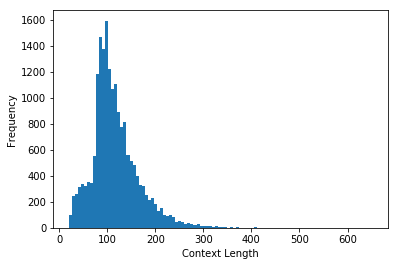

In [26]:
import matplotlib.pyplot as plt
num_bins = 100 # <- number of bins for the histogram
plt.hist(paragraph, num_bins)
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.show()

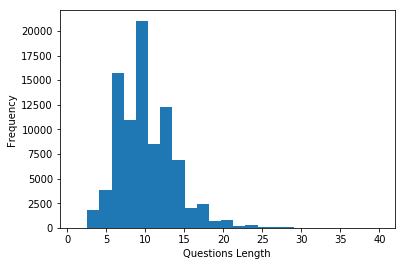

In [25]:
num_bins = 25 # <- number of bins for the histogram
plt.hist(qasCount, num_bins)
plt.xlabel('Questions Length')
plt.ylabel('Frequency')
plt.show()